# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. You will be using the Salary Data for the tasks in this module. <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [57]:
salary = pd.read_csv('Data/SalaryData.csv')
X = np.reshape(np.array(list(salary['YearsExperience'])), (-1, 1))
y = np.reshape(np.array(list(salary['Salary'])), (-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

for i in range(len(salary)):
    if(salary.loc[i, 'Salary'] < 60000):
        salary.loc[i, 'Salary<60000'] = 1
    else:
        salary.loc[i, 'Salary<60000'] = 0
x1 = np.reshape(np.array(list(salary['YearsExperience'])), (-1, 1))
y1 = np.reshape(np.array(list(salary['Salary<60000'])), (-1, 1))
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

### data visualisation

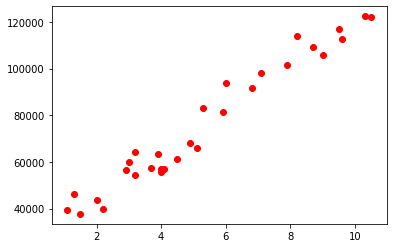

In [58]:
plt.scatter(X, y, color = "red")
plt.show()

### linear regressor code

In [59]:
def linear_fit(X, y):
    m_curr = b_curr = 0
    learning_rate = 0.01
    iterations = 3000
    n = len(X)
    
    for i in range(iterations):
        y_pred = m_curr * X + b_curr
        cost = (1/n) * sum([val**2 for val in y - y_pred])
        md = (-2/n) * sum(X * (y - y_pred))
        bd = (-2/n) * sum(y - y_pred)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
    return m_curr, b_curr
def linear_predict(X):
    y_pred = m_curr * X + b_curr
    return y_pred

m_curr, b_curr = linear_fit(X_train, y_train)
predicted_salary = (linear_predict(X_test).flatten())
for i in range(len(X_test)):
    print('YearsExperience {}, Salary_actual {}, Salary_predicted {}'.format(X_test.flatten()[i], y_test.flatten()[i], round(predicted_salary[i], 2)))

YearsExperience 1.5, Salary_actual 37731, Salary_predicted 40835.07
YearsExperience 10.3, Salary_actual 122391, Salary_predicted 123079.44
YearsExperience 4.1, Salary_actual 57081, Salary_predicted 65134.54
YearsExperience 3.9, Salary_actual 63218, Salary_predicted 63265.35
YearsExperience 9.5, Salary_actual 116969, Salary_predicted 115602.68
YearsExperience 8.7, Salary_actual 109431, Salary_predicted 108125.92
YearsExperience 9.6, Salary_actual 112635, Salary_predicted 116537.27
YearsExperience 4.0, Salary_actual 55794, Salary_predicted 64199.94
YearsExperience 5.3, Salary_actual 83088, Salary_predicted 76349.68
YearsExperience 7.9, Salary_actual 101302, Salary_predicted 100649.15


### results plot

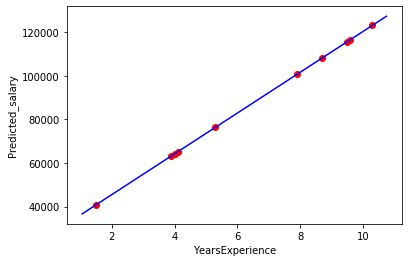

In [60]:
plt.scatter(X_test, predicted_salary, color = "red")
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b_curr + m_curr[0]* x_vals 
plt.xlabel('YearsExperience')
plt.ylabel('Predicted_salary')
plt.plot(x_vals, y_vals, color = 'blue')
plt.show()

## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

### data visualisation

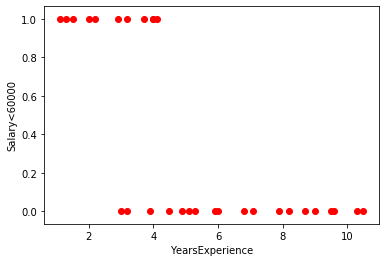

In [61]:
plt.scatter(x1, y1, color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary<60000')
plt.show()

### logistic regressor code

In [62]:
def logistic_fit(X, y):
    m_curr = b_curr = 0
    learning_rate = 0.01
    iterations = 3000
    n = len(X)
    
    for i in range(iterations):
        linear_model = m_curr * X + b_curr
        y_pred = sigmoid(linear_model)
        
        md = (1/n) * np.dot(X.T, (y_pred - y))
        bd = (1/n) * np.sum(y_pred - y)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
    
    return m_curr, b_curr

def logistic_predict(X):
    linear_model = m_curr * X + b_curr
    y_pred = sigmoid(linear_model)
    y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
    return y_pred_cls
        
def sigmoid(linear_model):
    return (1.0/(1.0 + np.exp(-linear_model)))
        
    
m_curr, b_curr = logistic_fit(x1_train, y1_train)
log_predict = np.array(logistic_predict(x1_test))
for i in range(len(x1_test)):
    print('YearsExperience {}, Salary<60000_actual {}, Salary<60000_predicted {}  '.format(x1_test.flatten()[i],y1_test[i], log_predict[i]))
    
    

YearsExperience 1.5, Salary<60000_actual [1.], Salary<60000_predicted 1  
YearsExperience 10.3, Salary<60000_actual [0.], Salary<60000_predicted 0  
YearsExperience 4.1, Salary<60000_actual [1.], Salary<60000_predicted 0  
YearsExperience 3.9, Salary<60000_actual [0.], Salary<60000_predicted 0  
YearsExperience 9.5, Salary<60000_actual [0.], Salary<60000_predicted 0  
YearsExperience 8.7, Salary<60000_actual [0.], Salary<60000_predicted 0  
YearsExperience 9.6, Salary<60000_actual [0.], Salary<60000_predicted 0  
YearsExperience 4.0, Salary<60000_actual [1.], Salary<60000_predicted 0  
YearsExperience 5.3, Salary<60000_actual [0.], Salary<60000_predicted 0  


### results plot

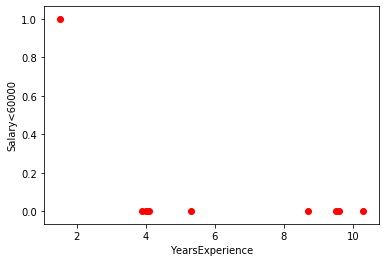

In [63]:
plt.scatter(x1_test, log_predict, color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary<60000')
plt.show()

## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.

### Quality of linear regressor

In [83]:
from sklearn import metrics
print('RMSE value is', round((np.sqrt(metrics.mean_squared_error(y_test, predicted_salary))), 2), 'which is very much less than 10% of mean of actual values i.e.,', np.mean(y_test)*0.10)
print('Hence the constructed linear regressor is much better.')
print('\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_salary), 'which is also less than 10 % of mean of actual values i.e.,', np.mean(y_test)*0.10)
print('\n')
se_line = np.sum((y_test.flatten() - (predicted_salary))**2)
se_mean = np.sum((y_test.flatten() - np.mean(y_test.flatten()))**2)
r2 = 1 - se_line/se_mean
print('The coefficient of determination or the r2 value is', round(r2, 2), 'which is less than perfect 1 just by a factor of 0.03.')

RMSE value is 4585.41 which is very much less than 10% of mean of actual values i.e., 8596.4
Hence the constructed linear regressor is much better.


Mean Absolute Error: 3426.4179072549027 which is also less than 10 % of mean of actual values i.e., 8596.4


The coefficient of determination or the r2 value is 0.97 which is less than perfect 1 just by a factor of 0.03.


### Accuracy of logistic regressor

In [82]:
def accuracy(y_actual, y_pred):
    accuracy = np.sum(y_actual == y_pred) / len(y_actual)
    return round(accuracy, 2)*100
print('The accuracy of the constructed logistic regressor is',accuracy(np.array(y1_test).flatten(), log_predict), '%')

The accuracy of the constructed logistic regressor is 78.0 %
